# Проект: Продвинутый SQL

**Задачи проекта:** С помощью SQL посчитаете и визуализируете ключевые метрики сервис-системы вопросов и ответов о программировании.

**Описание проекта:** Написаны все сложные SQL-запросы для подсчёта требуемых значений и метрик.

**Входные данные:** Работаем с базой данных StackOverflow — сервиса вопросов и ответов о программировании. StackOverflow похож на социальную сеть — пользователи сервиса задают вопросы, отвечают на посты, оставляют комментарии и ставят оценки другим ответам. В данной версии базы данных, хранятся данные о постах за 2008 год, но в таблицах можно найти информацию и о более поздних оценках, которые эти посты получили. 

## ER-диаграмма
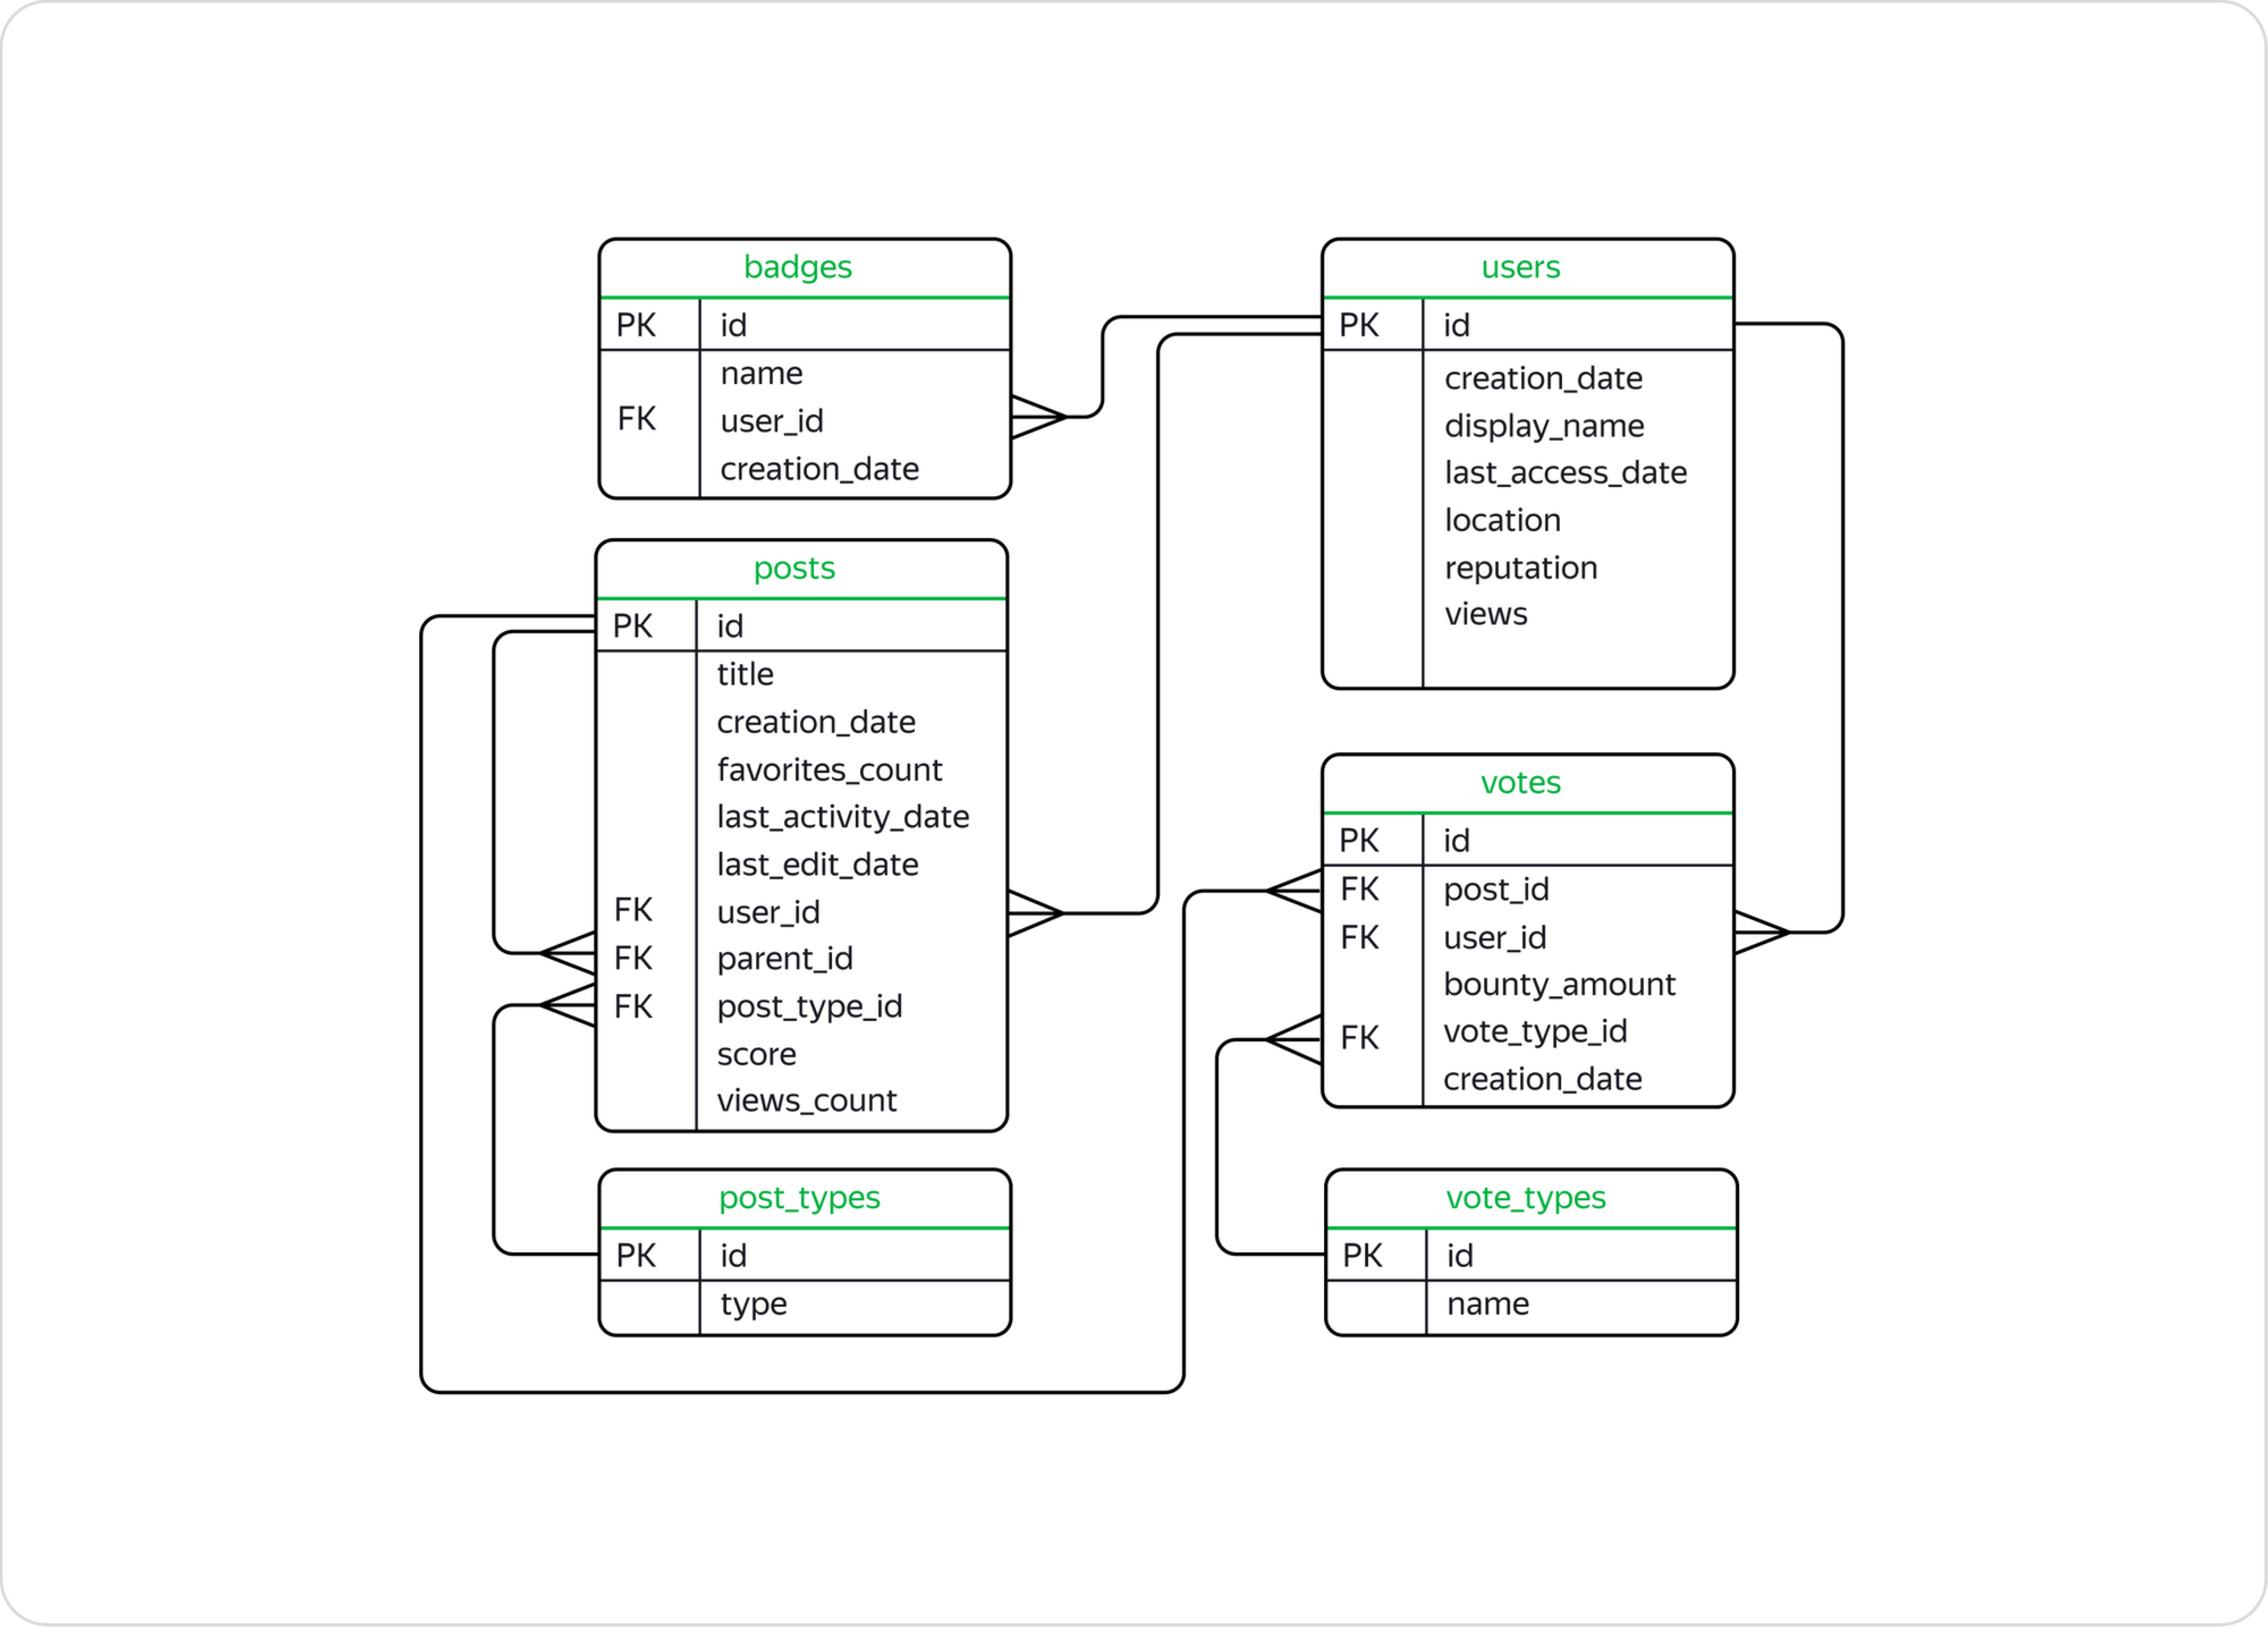

## Описание данных 

Таблица **stackoverflow.badges**<br>
Хранит информацию о значках, которые присуждаются за разные достижения. Например, пользователь, правильно ответивший на большое количество вопросов про PostgreSQL, может получить значок postgresql. <br>
- `id`— Идентификатор значка, первичный ключ таблицы<br>
- `name`— Название значка<br>
- `user_id`— Идентификатор пользователя, которому присвоили значок, внешний ключ, отсылающий к таблице users<br>
- `creation_date`— Дата присвоения значка<br>

Таблица **stackoverflow.post_types**<br>
Содержит информацию о типе постов. 
- `id` — Идентификатор поста, первичный ключ таблицы<br>
- `type` — Тип поста. Их может быть два:<br>
    - Question — пост с вопросом;<br>
    - Answer — пост с ответом.<br>

Таблица **stackoverflow.posts**<br>
Содержит информацию о постах.<br>
- `id` — Идентификатор поста, первичный ключ таблицы<br>
- `title` — Заголовок поста<br>
- `creation_date` — Дата создания поста<br>
- `favorites_count` — Число, которое показывает, сколько раз пост добавили в «Закладки»<br>
- `last_activity_date` — Дата последнего действия в посте, например комментария<br>
- `last_edit_date` — Дата последнего изменения поста<br>
- `user_id` — Идентификатор пользователя, который создал пост, внешний ключ к таблице users<br>
- `parent_id` — Если пост написали в ответ на другую публикацию, в это поле попадёт идентификатор поста с вопросом<br>
- `post_type_id` — Идентификатор типа поста, внешний ключ к таблице post_types<br>
- `score` — Количество очков, которое набрал пост<br>
- `views_count` — Количество просмотров<br>

Таблица **stackoverflow.users**<br>
Содержит информацию о пользователях.<br>
- `id` — Идентификатор пользователя, первичный ключ таблицы<br>
- `creation_date` — Дата регистрации пользователя<br>
- `display_name` — Имя пользователя<br>
- `last_access_date` — Дата последнего входа<br>
- `location` — Местоположение<br>
- `reputation` — Очки репутации, которые получают за хорошие вопросы и полезные ответы<br>
- `views` — Число просмотров профиля пользователя<br>

Таблица **stackoverflow.vote_types**<br>
Содержит информацию о типах голосов. Голос — это метка, которую пользователи ставят посту. 
- `id` — Идентификатор типа голоса, первичный ключ<br>
- `name` — Название метки. Типов бывает несколько: <br>
    - UpMod — такую отметку получают посты с вопросами или ответами, которые пользователи посчитали уместными и полезными.<br>
    - DownMod — такую отметку получают посты, которые показались пользователям наименее полезными.<br>
    - Close — такую метку ставят опытные пользователи сервиса, если заданный вопрос нужно доработать или он вообще не подходит для платформы.<br>
    - Offensive — такую метку могут поставить, если пользователь ответил на вопрос в грубой и оскорбительной манере, например, указав на неопытность автора поста.<br>
    - Spam — такую метку ставят в случае, если пост пользователя выглядит откровенной рекламой.<br><br>

Таблица **stackoverflow.votes**<br>
Содержит информацию о голосах за посты. <br>
- `id` — Идентификатор голоса, первичный ключ<br>
- `post_id` — Идентификатор поста, внешний ключ к таблице posts<br>
- `user_id` — Идентификатор пользователя, который поставил посту голос, внешний ключ к таблице users<br>
- `bounty_amount` — Сумма вознаграждения, которое назначают, чтобы привлечь внимание к посту<br>
- `vote_type_id` — Идентификатор типа голоса, внешний ключ к таблице vote_types<br>
- `creation_date` — Дата назначения голоса<br>

## Задания (Первая часть)

### 1. Найдите количество вопросов, которые набрали больше 300 очков или как минимум 100 раз были добавлены в «Закладки».

``` sql
SELECT COUNT(*)
FROM stackoverflow.posts p
INNER JOIN stackoverflow.post_types pt ON p.post_type_id = pt.id
WHERE (favorites_count>= 100 OR score > 300) AND type = 'Question'
```

### 2. Сколько в среднем в день задавали вопросов с 1 по 18 ноября 2008 включительно? Результат округлите до целого числа.

``` sql
SELECT ROUND(AVG(cnt_posts), 0)
FROM
(SELECT DISTINCT creation_date::date, COUNT(*) OVER(PARTITION BY creation_date::date) AS cnt_posts
FROM stackoverflow.posts p
INNER JOIN stackoverflow.post_types pt ON p.post_type_id = pt.id
WHERE type = 'Question' AND creation_date::date BETWEEN '2008-11-01' AND '2008-11-18') X
```

### 3. Сколько пользователей получили значки сразу в день регистрации? Выведите количество уникальных пользователей.

``` sql
SELECT COUNT(DISTINCT u.id)
FROM stackoverflow.users u
INNER JOIN stackoverflow.badges b ON u.id = b.user_id
WHERE u.creation_date::date = b.creation_date::date
```

### 4. Сколько уникальных постов пользователя с именем Joel Coehoorn получили хотя бы один голос?

``` sql
SELECT COUNT(DISTINCT votes.post_id) 
FROM stackoverflow.posts posts
INNER JOIN stackoverflow.users users ON posts.user_id = users.id
INNER JOIN stackoverflow.votes votes ON posts.id = votes.post_id
WHERE display_name = 'Joel Coehoorn'
```

### 5. Выгрузите все поля таблицы vote_types. Добавьте к таблице поле rank, в которое войдут номера записей в обратном порядке. Таблица должна быть отсортирована по полю id.

``` sql
SELECT *, RANK() OVER(ORDER BY id DESC) AS rank
FROM stackoverflow.vote_types
ORDER BY id
```

### 6. Отберите 10 пользователей, которые поставили больше всего голосов типа Close. Отобразите таблицу из двух полей: идентификатором пользователя и количеством голосов. Отсортируйте данные сначала по убыванию количества голосов, потом по убыванию значения идентификатора пользователя.

``` sql
SELECT DISTINCT user_id, COUNT(*) OVER(PARTITION BY user_id) cnt
FROM stackoverflow.votes votes
INNER JOIN stackoverflow.vote_types vote_types ON votes.vote_type_id = vote_types.id
WHERE vote_types.name = 'Close'
ORDER BY cnt DESC, user_id DESC
LIMIT 10
```

### 7. Отберите 10 пользователей по количеству значков, полученных в период с 15 ноября по 15 декабря 2008 года включительно.
Отобразите несколько полей:
- идентификатор пользователя;
- число значков;
- место в рейтинге — чем больше значков, тем выше рейтинг. Пользователям, которые набрали одинаковое количество значков, присвойте одно и то же место в рейтинге.

Отсортируйте записи по количеству значков по убыванию, а затем по возрастанию значения идентификатора пользователя.

``` sql
SELECT *, DENSE_RANK() OVER(ORDER BY cnt DESC)
FROM
(SELECT DISTINCT 
    user_id, 
    COUNT(*) OVER(PARTITION BY user_id) cnt
FROM stackoverflow.badges
WHERE creation_date::date BETWEEN '2008-11-15' AND '2008-12-15') X
ORDER BY cnt DESC, user_id
LIMIT 10
```

### 8. Сколько в среднем очков получает пост каждого пользователя?
Сформируйте таблицу из следующих полей:
- заголовок поста;
- идентификатор пользователя;
- число очков поста;
- среднее число очков пользователя за пост, округлённое до целого числа.

Не учитывайте посты без заголовка, а также те, что набрали ноль очков.

``` sql
SELECT title, user_id, score, ROUND(AVG(score) OVER(PARTITION BY user_id), 0)
FROM stackoverflow.posts
WHERE (title IS NOT NULL) AND score != 0
```

### 9. Отобразите заголовки постов, которые были написаны пользователями, получившими более 1000 значков. Посты без заголовков не должны попасть в список.

``` sql
SELECT title
FROM stackoverflow.posts
WHERE title IS NOT NULL AND user_id IN (SELECT user_id FROM stackoverflow.badges GROUP BY user_id HAVING COUNT(*) > 1000)
```

### 10. Напишите запрос, который выгрузит данные о пользователях из Канады (англ. Canada). Разделите пользователей на три группы в зависимости от количества просмотров их профилей:
- пользователям с числом просмотров больше либо равным 350 присвойте группу 1;
- пользователям с числом просмотров меньше 350, но больше либо равно 100 — группу 2;
- пользователям с числом просмотров меньше 100 — группу 3.

Отобразите в итоговой таблице идентификатор пользователя, количество просмотров профиля и группу. Пользователи с количеством просмотров меньше либо равным нулю не должны войти в итоговую таблицу.

``` sql
SELECT 
    id, 
    views, 
    CASE
        WHEN views >= 350 THEN 1
        WHEN views >= 100 THEN 2
        ELSE 3
    END
FROM stackoverflow.users
WHERE location LIKE '%Canada%' AND views > 0
```

### 11. Дополните предыдущий запрос. Отобразите лидеров каждой группы — пользователей, которые набрали максимальное число просмотров в своей группе. Выведите поля с идентификатором пользователя, группой и количеством просмотров. Отсортируйте таблицу по убыванию просмотров, а затем по возрастанию значения идентификатора.

``` sql
WITH X AS
    (SELECT id, views, 
        CASE
            WHEN views >= 350 THEN 1
            WHEN views >= 100 THEN 2
            ELSE 3
        END AS class
    FROM stackoverflow.users
    WHERE location LIKE '%Canada%' AND views > 0)
    
SELECT id, class, views
FROM X AS X1
WHERE views = (SELECT MAX(views) FROM X AS X2 WHERE X1.class = X2.class)
ORDER BY views DESC, id
```

### 12. Посчитайте ежедневный прирост новых пользователей в ноябре 2008 года. Сформируйте таблицу с полями:
- номер дня;
- число пользователей, зарегистрированных в этот день;
- сумму пользователей с накоплением.

``` sql
SELECT DISTINCT
    EXTRACT(DAY FROM creation_date) AS day, 
    COUNT(id) OVER(PARTITION BY creation_date::date) sum_per_day,
    COUNT(id) OVER(ORDER BY creation_date::date) total_sum
FROM stackoverflow.users
WHERE creation_date::date BETWEEN '2008-11-01' AND '2008-11-30'
```

### 13. Для каждого пользователя, который написал хотя бы один пост, найдите интервал между регистрацией и временем создания первого поста. Отобразите:
- идентификатор пользователя;
- разницу во времени между регистрацией и первым постом.

``` sql
SELECT DISTINCT users.id, MIN(posts.creation_date) OVER(PARTITION BY users.id) - users.creation_date
FROM stackoverflow.users users
INNER JOIN stackoverflow.posts posts ON users.id = posts.user_id
```

## Задания (Вторая часть)

### 1. Выведите общую сумму просмотров у постов, опубликованных в каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

``` sql
SELECT DATE_TRUNC('MONTH', creation_date)::date AS month, SUM(views_count)
FROM stackoverflow.posts
WHERE EXTRACT(YEAR FROM creation_date) = 2008
GROUP BY month
ORDER BY 2 DESC
```

### 2. Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений user_id. Отсортируйте результат по полю с именами в лексикографическом порядке.

``` sql
SELECT users.display_name, COUNT(DISTINCT posts.user_id)
FROM stackoverflow.posts posts 
INNER JOIN  stackoverflow.post_types post_types ON posts.post_type_id = post_types.id
INNER JOIN stackoverflow.users users ON posts.user_id = users.id
WHERE post_types.type LIKE '%Answer%' AND
posts.creation_date::date BETWEEN users.creation_date::date AND (users.creation_date::date + INTERVAL '1 month') 
GROUP BY users.display_name
HAVING COUNT(posts.id) > 100
ORDER BY users.display_name;
```

### 3. Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

``` sql
WITH target_users AS
(SELECT u.id
FROM 
    stackoverflow.posts p
    INNER JOIN stackoverflow.users u ON u.id = p.user_id
WHERE 
    DATE_TRUNC('month', u.creation_date)::date = '2008-09-01' AND 
    DATE_TRUNC('month', p.creation_date)::date = '2008-12-01')
    
SELECT DATE_TRUNC('month', p.creation_date)::date AS month, COUNT(*)
FROM stackoverflow.posts p
WHERE p.user_id IN (SELECT * FROM target_users)
GROUP BY month
ORDER BY month DESC
```

### 4. Используя данные о постах, выведите несколько полей:
- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумма просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

``` sql
SELECT p.user_id, p.creation_date, views_count, SUM(views_count) OVER(PARTITION BY p.user_id ORDER BY p.creation_date)
FROM stackoverflow.posts p
ORDER BY p.user_id, p.creation_date
```

### 5. Сколько в среднем дней в период с 1 по 7 декабря 2008 года включительно пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат.

``` sql
WITH days AS
    (SELECT user_id, COUNT(DISTINCT creation_date::date) cnt
    FROM stackoverflow.posts
    WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-07'
    GROUP BY user_id)

SELECT ROUND(AVG(cnt), 0)
FROM days
```

### 6. На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:
- Номер месяца.
- Количество постов за месяц.
- Процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.
- Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип numeric.

``` sql
SELECT month, cnt, ROUND(cnt * 100.0 / LAG(cnt) OVER(ORDER BY month) - 100, 2) AS change
FROM
(SELECT DISTINCT 
    EXTRACT(MONTH FROM creation_date) AS month,
    COUNT(*) cnt
FROM stackoverflow.posts
WHERE creation_date::date BETWEEN '2008-09-01' AND '2008-12-31'
GROUP BY month) X
```

### 7. Найдите пользователя, который опубликовал больше всего постов за всё время с момента регистрации. Выведите данные его активности за октябрь 2008 года в таком виде:
- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

``` sql
SELECT DISTINCT EXTRACT(week FROM creation_date), MAX(creation_date) OVER(PARTITION BY EXTRACT(week FROM creation_date))
FROM stackoverflow.posts
WHERE user_id IN
    (SELECT user_id
    FROM stackoverflow.posts
    GROUP BY user_id
    ORDER BY COUNT(*) DESC
    LIMIT 1)
AND DATE_TRUNC('month', creation_date)::date = '2008-10-01'
```